In [30]:
%%time
# 이미지 파일들을 h5py 파일로 압축하는 과정(오래걸림, 15~20분)

import h5py
import zipfile
import imageio
import os
hdf5_file = '../../data/celeba/celeba_aligned_small.h5py'
total_images = 1000
with h5py.File(hdf5_file, 'w') as hf:
    count = 0
    with zipfile.ZipFile('../../data/celeba/img_align_celeba.zip', 'r') as zf:
        for i in zf.namelist():
            if (i[-4:] == '.jpg'):
                # extract image
                ofile = zf.extract(i)
                img = imageio.v2.imread(ofile)
                os.remove(ofile)
                # 이미지 데이터를 h5py 모델에 추가하는 과정
                hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
                count = count + 1
                if count % 1000 == 0:
                    print("images done .. ", count)
                if count == total_images:
                    break

images done ..  1000
CPU times: total: 7.89 s
Wall time: 17.4 s


데이터 불러오기

In [31]:
import h5py
# h5py 파일 확인
with h5py.File('../../data/celeba/celeba_aligned_small.h5py', 'r') as file_object:
    for group in file_object:
        print(group)

img_align_celeba


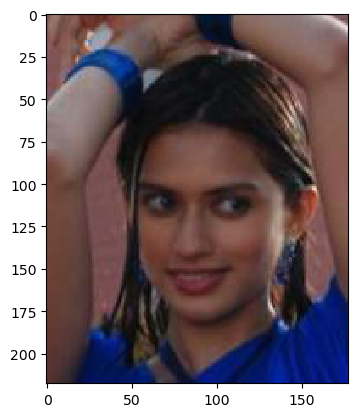

In [35]:
import matplotlib.pyplot as plt
import numpy as np

with h5py.File('../../data/celeba/celeba_aligned_small.h5py', 'r') as fp:
    dataset = fp['img_align_celeba']
    image = np.array(dataset['999.jpg'])
    plt.imshow(image, interpolation='none')

In [36]:
image.shape

(218, 178, 3)